# Coding practice \#3

files needed = (`monthly_rides.csv`, `monthly_loc_rides.csv`, `crude.png` )

Answer the questions below in a Jupyter notebook. You can modify this notebook by adding cells with your answers. It is recommended to try it on your own to practice the material in advance the exams.

## Exercise 0: Hong, Ruijing

Replace 'Last, First' above with your actual name. Enter it as your last name, first name.

## Exercise 1: Time series and subplots

Files needed: `monthly_rides.csv`

We'll revisit the ride-sharing data from the exam. The file `monthly_rides.csv` is taken from [Chicago's Open Data Portal](https://data.cityofchicago.org/). The dataset is a monthly time-series on ride-sharing platforms in the city of Chicago. There are a few variables:
- `year` : the year of the ride
- `month` : the month of the ride
- `avg_fare` : how much Uber, Lyft, and other ride-share companies charged (average)
- `avg_miles` : how far the ride was (in miles, average)
- `num_rides` : the number of rides taken

The goal of this question is to explore how to parsimoniously represent multiple variables with potentially different scales.

### Part (a):

Read `monthly_rides.csv` into a DataFrame named `monthly_rides`. Use time-series methods to create a variable in your DataFrame that includes both year and month information, and set it as the index.

In [20]:
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns
import datetime as dt                

monthly_rides = pd.read_csv('monthly_rides.csv')
monthly_rides.head(5)


monthly_rides.dtypes

monthly_rides['ym'] = monthly_rides['year'].astype(str) + "-" + monthly_rides['month']. astype(str)
monthly_rides['ym'] = pd.to_datetime(monthly_rides['ym'])

#or monthly_rides['ym'] = pd.to_datetime(monthly_rides['year'].astype(str) + "-" + monthly_rides['month']. astype(str))

monthly_rides.set_index('ym', inplace = True)
monthly_rides.head(5)


,year,month,avg_fare,avg_miles,num_rides
ym,,,,,
2018-11-01,2018,11,11.277332,6.069482,8678369
2018-12-01,2018,12,10.906821,5.878371,8588533
2019-01-01,2019,1,10.503290,5.774890,8681707
2019-02-01,2019,2,10.882254,5.864818,8735507
2019-03-01,2019,3,11.086125,5.991561,10148660


### Part (b):

1. Create a figure with three subplots (three rows in a single column). Use visualization best practices regarding sizes and labeling. For each plot, include a vertical line indicating 03/15/2020 and noting that it marked the first Covid-19 shutdowns. For full credit, avoid hard-coding and instead use `datetime` tools to print the date as March 15, 2020 on each plot.

    1. In the first subplot, create a line plot of the average fare by month. Make the line solid and red. 

    2. In the second subplot, create a line plot of the average distance in miles by month. Make the line blue with a dash-dot pattern.

    3. In the third subplot, create a line plot of the number of rides by month. Make the line dotted and black.

In [24]:
covid = dt.datetime.strptime('3/15/2020', '%m/%d/%Y')
covid_plus = dt.datetime.strptime('3/25/2020', '%m/%d/%Y')
label = 'US Covid-19 shutdowns: \n' + covid.strftime('%B %d, %Y')

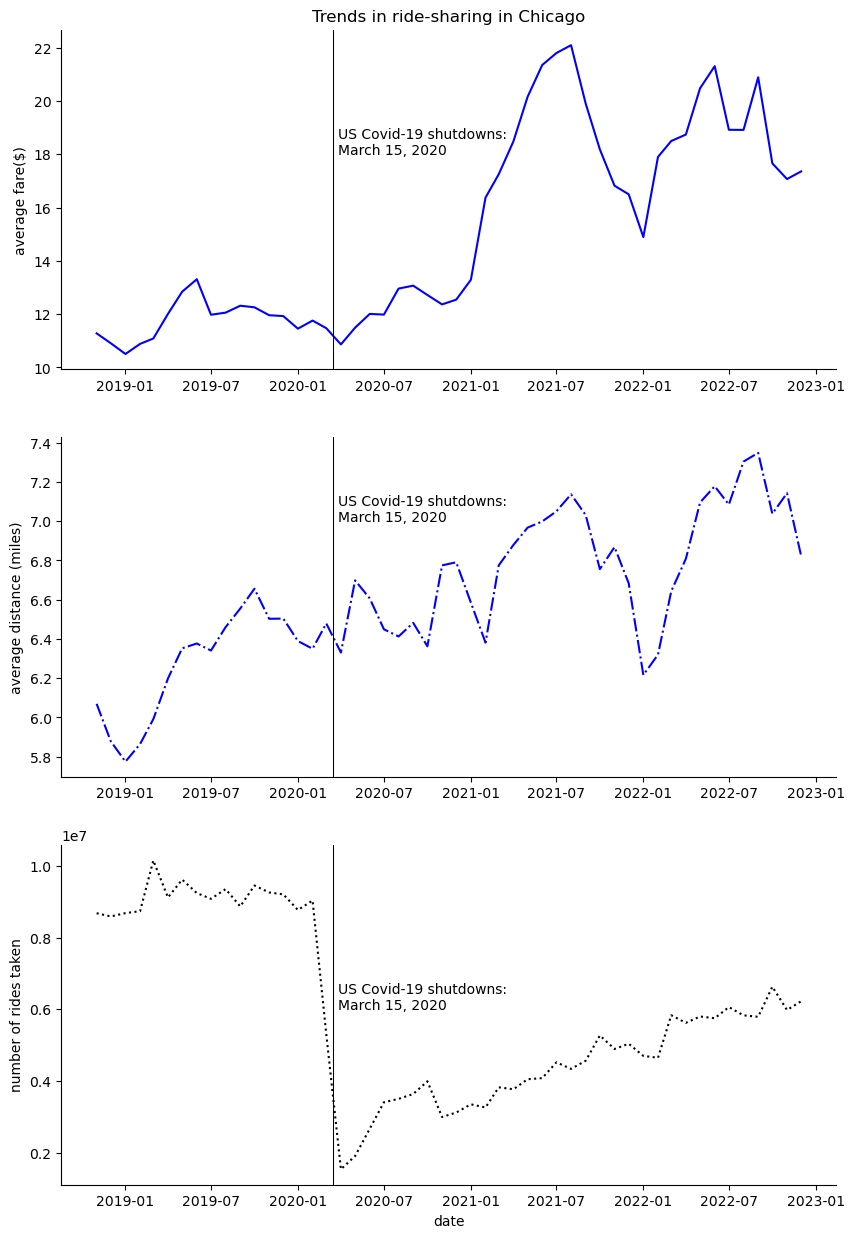

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
#average fare by month
axes[0].plot(monthly_rides.index, monthly_rides['avg_fare'], color = 'red', label = 'average fare by month')
axes[0].set_title('Trends in ride-sharing in Chicago')
axes[0].set_ylabel('average fare($)')
axes[0].axvline(dt.datetime(2020,3,15), color='black', linewidth = 0.75)
axes[0].text(covid_plus,18,label)

# Average distance by month
axes[1].plot(monthly_rides.index, monthly_rides.avg_miles, color='blue', linestyle='-.')
axes[1].set_ylabel("average distance (miles)")
axes[1].axvline(x=covid, color='black', linewidth=0.75)  
axes[1].text(covid_plus, 7, label)

#number of rides by month
axes[2].plot(monthly_rides.index, monthly_rides.num_rides, color='black', linestyle=':')
axes[2].set_ylabel("number of rides taken")
axes[2].set_xlabel("date")
axes[2].axvline(x=covid, color='black', linewidth=0.75)  
axes[2].text(covid_plus, .6e7, label)

# Despine
[ax.spines['right'].set_visible(False) for ax in axes]
[ax.spines['top'].set_visible(False) for ax in axes]

plt.show()



### Part (c):

Create a new figure that plots the three time series above on the same plot. Keep the same line color and pattern for each series as above, and add a legend with labels for each line.

Is this a good example of graphical excellence?

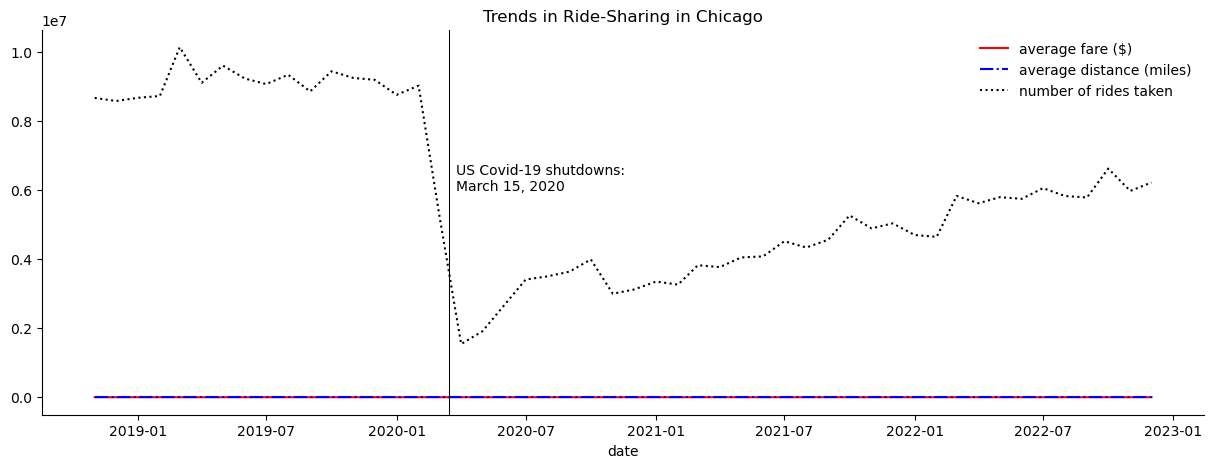

In [28]:
# Create axes
fig, ax = plt.subplots(figsize=(15, 5)) 
ax.set_title("Trends in Ride-Sharing in Chicago")
ax.set_xlabel("date")

# Average fare
ax.plot(monthly_rides.index, monthly_rides.avg_fare, color='red', label='average fare ($)')
ax.plot(monthly_rides.index, monthly_rides.avg_miles, color='blue', linestyle='-.', label="average distance (miles)")
ax.plot(monthly_rides.index, monthly_rides.num_rides, color='black', linestyle=':', label="number of rides taken")

ax.set_xlabel("date")
ax.axvline(x=covid, color='black', linewidth=0.75)  
ax.text(covid_plus, .6e7, label)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)                           # Show the legend. frameon=False kills the box around the legend

plt.show()

### Part (d):
Let's put average fare and number of rides on the same subplot with two different y-axes.

1. Use the `twinx()` method of matplotlib ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)) to plot the number of rides on the left axis and the average fare on the right axis. 
2. Add all of the labels that you need. 

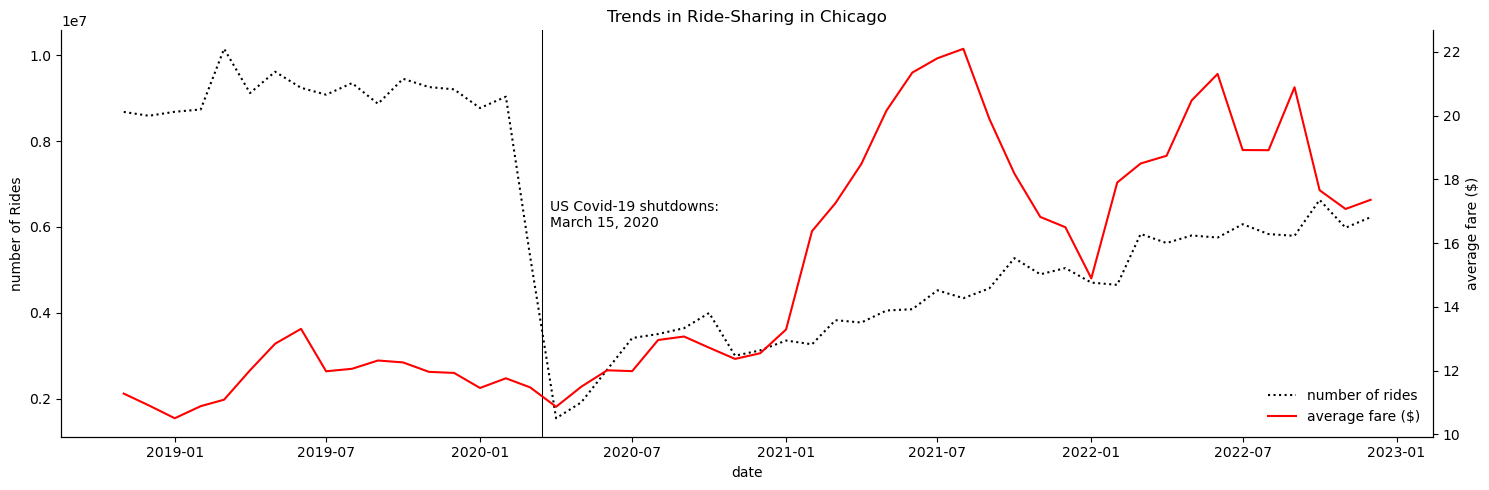

In [113]:
# First axis
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.set_title("Trends in Ride-Sharing in Chicago")
ax1.set_xlabel('date')

# Set labels and plot
ax1.set_ylabel('number of Rides')
l1, = ax1.plot(monthly_rides.index, monthly_rides.num_rides, color='black', linestyle=':', label='number of rides')

# Second twin axis
ax2 = ax1.twinx()

# Set labels and plot
ax2.set_ylabel('average fare ($)')
l2, = ax2.plot(monthly_rides.index, monthly_rides.avg_fare, color='red', linestyle='-', label='average fare ($)')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.axvline(x=covid, color='black', linewidth=0.75)  
ax1.text(covid_plus, .6e7, label)

# Tighten layout
ax2.legend([l1, l2], ['number of rides', 'average fare ($)'], frameon=False, loc='lower right')
fig.tight_layout()

### Part (e):
Create another DataFrame containing a quarterly average of rides per month. Plot the monthly and quarterly series on the same axis. Does it look like one series lags the other? Why or why not?

In [114]:
df_q = monthly_rides.resample('q').mean()
df_q.head(5)

,year,month,avg_fare,avg_miles,num_rides
ym,,,,,
2018-12-31,2018.0,11.5,11.092077,5.973927,8.633451e+06
2019-03-31,2019.0,2.0,10.823890,5.877089,9.188625e+06
2019-06-30,2019.0,5.0,12.720083,6.309400,9.324223e+06
2019-09-30,2019.0,8.0,12.116332,6.452190,9.099381e+06
2019-12-31,2019.0,11.0,12.047197,6.554238,9.304027e+06


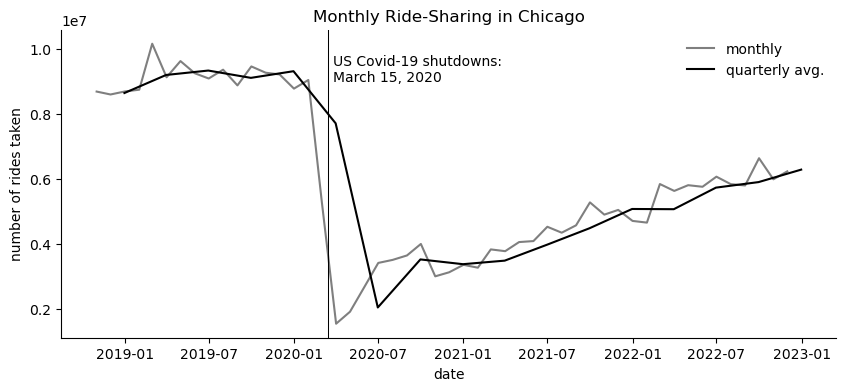

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Average fare
ax.set_title("Monthly Ride-Sharing in Chicago")
ax.plot(monthly_rides.index, monthly_rides.num_rides, color='black', alpha=.5, label='monthly')
ax.plot(df_q.index, df_q.num_rides, color='black', label='quarterly avg.')

ax.set_ylabel("number of rides taken")
ax.set_xlabel("date")
ax.axvline(x=covid, color='black', linewidth=0.75)  
ax.text(covid_plus, .9e7, label)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)                           # Show the legend. frameon=False kills the box around the legend

plt.show()


## Exercise 2: Seaborn

Files needed: `monthly_loc_rides.csv`

The file `monthly_loc_rides.csv` is also taken from [Chicago's Open Data Portal](https://data.cityofchicago.org/). The dataset is a monthly time-series by location on ride-sharing platforms in the city of Chicago. There are a few variables:
- `year` : the year of the ride
- `month` : the month of the ride
- `location` : the community area (location) of the origin of the ride
- `avg_fare` : how much Uber, Lyft, and other ride-share companies charged (average)
- `miles` : how far the ride was (in miles, average)
- `num_rides` : the number of rides in a month-location

The goal of this question is to use multiple visualization tools in the same figure, to understand the relationship between two variables.

### Part (a):

Read `monthly_loc_rides.csv` into a DataFrame named `monthly_loc_rides`. Make sure to drop observations where `location` is missing. How many observations are left? Print it out.

In [38]:
loc_rides = pd.read_csv('monthly_loc_rides.csv')
loc_rides.dropna()
#3850 rows × 6 columns

,year,month,location,avg_fare,avg_miles,num_rides
0,2018,11,1.0,10.645126,5.917467,97946
1,2018,11,2.0,9.895857,5.582752,70744
2,2018,11,3.0,9.948583,5.298680,185151
3,2018,11,4.0,10.123744,5.070587,88954
4,2018,11,5.0,10.014318,4.787730,103538
...,...,...,...,...,...,...
3894,2022,12,73.0,14.859533,7.438620,22977
3895,2022,12,74.0,16.044063,7.459407,5912
3896,2022,12,75.0,15.836450,8.009189,17646
3897,2022,12,76.0,32.211564,17.619063,264157


### Part (b):

Use `seaborn` to explore the relationship between fares and distance. To begin, create a regplot of fares vs. distance, with the marginal distributions of those variables displayed as histograms along the top and right spines. Comment on what you see. 

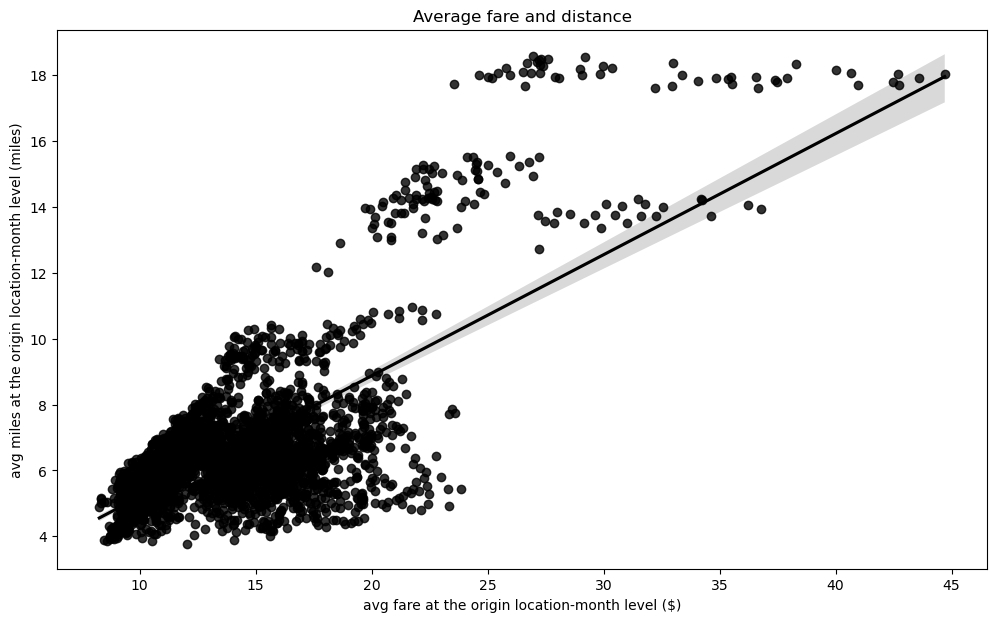

In [42]:
fig, ax = plt.subplots(figsize=(12,7))

sns.regplot(data=loc_rides, x='avg_fare', y='avg_miles', color = 'black', ci = 95) 


ax.set_title('Average fare and distance')
ax.set_ylabel('avg miles at the origin location-month level (miles)')
ax.set_xlabel('avg fare at the origin location-month level ($)')

plt.show()


### Part (c):

Use the above exploration to create a new DataFrame that focuses on the data corresponding to the first peak of the travel distance distribution. With that DataFrame, create a bubble plot of average fare vs. average miles, with a regplot overlaid. Use the following specifications: 
1. The y-axis should be average fare and the x-axis should be average miles.
2. Add a 95% confidence interval around a blue regression line.
3. The bubble plot should also be blue. Use alpha to make the bubbles lighter than the regression line.
4. Bubbles should be scaled proportionally to the number of rides.

Briefly comment on your results. What share of the original dataset's observations are in your new dataset? Does fare seem to scale linearly in price?

In [43]:
rides_short = loc_rides[loc_rides['avg_miles']<10]
print("{0:.0f}% of the original dataset's observations are in my new dataset.".format(rides_short.shape[0]*100/loc_rides.shape[0]))

95% of the original dataset's observations are in my new dataset.


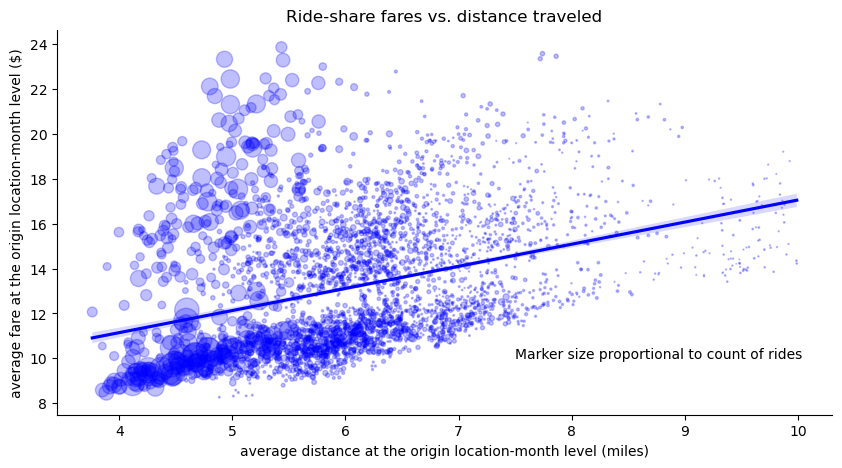

In [44]:
fig, ax = plt.subplots(figsize=(10,5)) 

my_kws={'s': rides_short['num_rides']/5000, 'alpha':0.25, 'color':'blue'}

sns.regplot(x='avg_miles', y='avg_fare', data=rides_short,    
            ax = ax,                                   
            scatter_kws = my_kws,                      
            color = 'blue',   
            ci = 95)                               

# We need to let the reader know what the bubble sizes represent.
ax.text(7.5, 10, 'Marker size proportional to count of rides')                                                         

sns.despine(ax = ax)
                                   
ax.set_title('Ride-share fares vs. distance traveled')
ax.set_ylabel('average fare at the origin location-month level ($)')
ax.set_xlabel('average distance at the origin location-month level (miles)')
plt.show()

## Exercise 3: APIs and multiIndex

Let's practice using API calls and multiIndex to select observations from data with multiple dimensions.  

### Part (a):

Use an API call to import World Bank data on the percent of countries' populations with access to electricity. This indicator has code `'EG.ELC.ACCS.ZS'`. For your own edification, try to confirm this fact at the [World Bank indicators](https://data.worldbank.org/indicator) website. Recall that the general World Bank datareader documentation is [here](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html). 

1. Get the electricity data for Afghanistan, Haiti, Nepal, Peru, and Tanzania. 
2. Rename the data column to be more descriptive.
3. What range of years is available for each country?

In [116]:
import pandas as pd
import datetime as dt                
import pandas_datareader.data as web    
from pandas_datareader import wb

countries = ['Afghanistan', 'Haiti', 'Nepal', 'Peru', 'Tanzania']
country_codes = ['PER', 'AFG', 'NPL', 'HTI', 'TZA']
elec = wb.download(indicator='EG.ELC.ACCS.ZS',\
                   country=country_codes,\
                   start=1900, end=dt.datetime.now().year)
elec.dropna(inplace=True)
elec.columns = ['elec']
elec.tail(5)

elec
country  year          
Tanzania 1996  9.400000
         1995  4.269067
         1994  3.300647
         1993  2.330188
         1992  6.800000

### Part (b):

1. Reset the index.
2. Make the year a datetime object.
3. Set the index to be `year`, then `country`.
4. Sort the index.
5. Print out the first and last rows of the DataFrame.

In [73]:
elec.reset_index(inplace = True)
elec.head(5)
elec['year'] = pd.to_datetime(elec['year'])
elec.set_index(['year','country'], inplace = True)
elec.sort_index(inplace = True)
elec

index       elec
year       country                      
1992-01-01 Peru           104  70.100000
           Tanzania       134   6.800000
1993-01-01 Peru           103  64.748993
           Tanzania       133   2.330188
1994-01-01 Peru           102  66.052933
...                       ...        ...
2021-01-01 Afghanistan      0  97.700000
           Haiti           22  47.180332
           Nepal           49  89.900000
           Peru            75  95.600000
           Tanzania       105  42.743362

[135 rows x 2 columns]

### Part (c): 

Keep only a *balanced panel* of these data, so that you have the same years for all countries. Check how many observations there are, and explain why that is correct.

In [81]:
balanced = elec[elec.groupby('year').count() == 5].dropna()
balanced
#There are 5 (countries) * 22 (years) = 110 (observations) in the balanced panel dataset.

index       elec
year       country                      
2000-01-01 Afghanistan   21.0   4.446891
           Haiti         43.0  33.700000
           Nepal         70.0  29.867804
           Peru          96.0  72.496495
           Tanzania     126.0   8.651097
...                       ...        ...
2021-01-01 Afghanistan    0.0  97.700000
           Haiti         22.0  47.180332
           Nepal         49.0  89.900000
           Peru          75.0  95.600000
           Tanzania     105.0  42.743362

[110 rows x 2 columns]

### Part (d): 
Without changing the index, print out all the rows for Nepal.

In [85]:
nepal = elec.xs('Nepal', level = 'country', drop_level=False)  	#select obs from index2 
nepal.tail(5)

,,index,elec
year,country,,
2017-01-01,Nepal,53,86.624657
2018-01-01,Nepal,52,93.920000
2019-01-01,Nepal,51,89.900000
2020-01-01,Nepal,50,89.900000
2021-01-01,Nepal,49,89.900000


### Part (e): 
Use a loop to determine which country had the lowest growth in electricity access over this period, and print the result in a nicely-formatted sentence.

In [115]:
growth = []
min_g_i = 0
min_g = 100
for i, c in enumerate(countries):
    temp = elec.xs(c, level=1)
    g = temp.loc['2021','elec'].values[0]-temp.loc['2000','elec'].values[0]
    if g < min_g:
        min_g_i = i
    min_g = min(min_g, g)
    growth.append(g)
print('Among these countries, ' + countries[min_g_i] + ' had the least growth in access to electricity between 2000 and 2021, at only {0:.0f} percentage points.'.format(min_g))


Among these countries, Haiti had the least growth in access to electricity between 2000 and 2021, at only 13 percentage points.


## Ungraded Bonus Exercise 4: APIs and visualization of time-series data

Files needed: `crude.png` 

*This bonus exercise is another opportunity for you to practice with APIs and time-series data visualization. We will not grade it, but we will post solutions for anyone who finds it fun or useful to tackle.*

In this [report](https://www.stlouisfed.org/on-the-economy/2022/jun/russia-invasion-ukraine-impact-stock-prices), Federal Reserve researchers analyze the response of key commodity prices (crude oil, wheat, and palladium) to the Russia-Ukraine War. We'd like you to re-create a portion of the authors' graph. The original report uses proprietary data, but we can do something similar using publicly-available data.  We'll focus on the price of crude oil.

### Part (a)

1. Read in data using the `DCOILBRENTEU` code from FRED using the `pandas_datareader` package. 
2. Specify the start date as 2022-01-03 and the end date as 2022-04-02. 
3. Rename your column `crude_oil`.
4. Normalize prices by the price on the first day in the series.
5. Print the first 7 rows.

In [93]:
import pandas_datareader.data as web   
code = 'DCOILBRENTEU'
fred = web.DataReader(code, 'fred', start= '2022-01-03', end = '2022-04-02')    
fred = fred.rename(columns={'DCOILBRENTEU':'crude_oil'})
fred


fred['price_n'] = fred['crude_oil'] / fred.loc['2022-01-03', 'crude_oil']
fred.head(7)

,crude_oil,price_n
DATE,,
2022-01-03,78.25,1.000000
2022-01-04,79.39,1.014569
2022-01-05,80.60,1.030032
2022-01-06,81.99,1.047796
2022-01-07,82.28,1.051502
2022-01-10,81.56,1.042300
2022-01-11,84.98,1.086006


### Part (b)

The goal is to re-create a portion of the plot from FRED. 
1. Create a line plot showing the relative price of crude oil over time in red. 
2. Add a dotted vertical line for February 24, 2022. 
3. Add descriptive labels for your axes and title.
4. Add a text label for the invasion date.

The result should look like this:
![example_fig](crude.png)

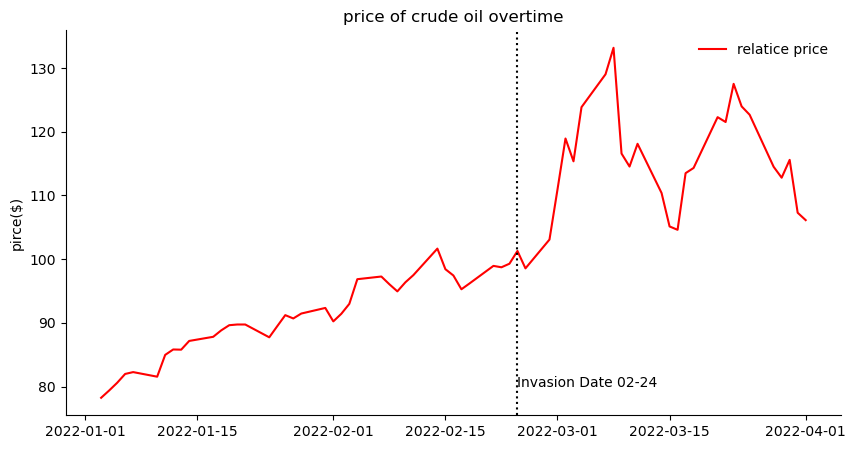

In [110]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fred.index, fred['crude_oil'], color = 'red', label = 'relatice price', alpha = 1)

ax.axvline(dt.datetime(2022,2,24), color='black', linestyle='dotted')

ax.annotate('Invasion Date 02-24', 
            xy=(dt.datetime(2022,2,24), 80))

ax.set_title('price of crude oil overtime')
ax.set_ylabel('pirce($)')
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

